# Predicting Polar Bear Den Location from Climate Data
## Dataset 1985 - 2016 tracking of over 300 bears to predict den location
## Use the unsupervised k-means clustering do categorize polar bear den location into 10 distinct zones

#### Machine Learning Pipeline Overview
1. Import and clean the dataset -- remove null values, select relevant columns
2. Split data into training and testing data set
3. Normalize quantitative data using MinMaxScalar
4. Define, Train and Score Models
5. Select highest scoring model and hypertune (Random Forest)
6. Save model using pickle for future predictions

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib for saving
# Restart kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("../../../data/ml_compile.csv")

In [5]:
df.columns

Index(['year_month', 'land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent', 'bear_rsf_mean', 'bear_rsf_var', 'longitude_rsf',
       'latitude_rsf', 'loc_zone', 'num_bears', 'avg_distance_traveled',
       'avg_num_land_dens', 'avg_num_ice_dens', 'avg_num_active_dens',
       'den_lat', 'den_long', 'den_loc'],
      dtype='object')

# Machine Learning: Climate and Den Location

In [6]:
df = df[['land_avg_temp','land_ocean_avg_temp', 'global_avg_co2', 'seaice_extent', 'loc_zone']]

In [7]:
#Drop null values
df = df.dropna(axis=0)

In [8]:
df.describe()

,land_avg_temp,land_ocean_avg_temp,global_avg_co2,seaice_extent,loc_zone
count,331.000000,331.000000,331.000000,331.000000,331.000000
mean,9.385082,15.712589,372.225619,11.357481,3.888218
std,4.121994,1.225211,16.649756,3.220250,2.361859
min,2.710000,13.566000,343.130000,3.565600,0.000000
25%,5.552000,14.511000,356.145000,8.513177,2.000000
50%,9.618000,15.811000,372.250000,12.016400,4.000000
75%,13.443000,16.884000,386.235000,14.326682,5.000000
max,15.482000,17.611000,403.960000,16.050143,9.000000


In [9]:
X = df[['land_avg_temp','land_ocean_avg_temp', 'global_avg_co2', 'seaice_extent']]
y = df['loc_zone'].values.reshape(-1,1)
print(X.shape, y.shape)

(331, 4) (331, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

# STEP 2: Create a StandardScater model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Multiple Linear Regression Analysis

In [12]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.01609929956969769
Testing Score: -0.0037602980785147455


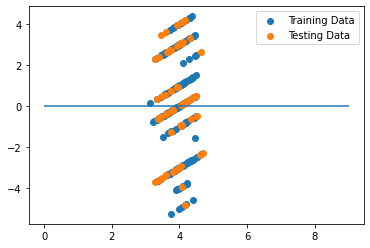

In [14]:
# Residuals
predTrain = model.predict(X_train_scaled)
predTest = model.predict(X_test_scaled)

# Plot Residuals
plt.scatter(predTrain, predTrain - y_train, label="Training Data")
plt.scatter(predTest, predTest - y_test, label="Testing Data")
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.legend()
plt.show()

# KNN

k: 1, Train/Test Score: 1.000/0.164
k: 3, Train/Test Score: 0.504/0.149
k: 5, Train/Test Score: 0.447/0.209
k: 7, Train/Test Score: 0.409/0.164
k: 9, Train/Test Score: 0.390/0.179
k: 11, Train/Test Score: 0.394/0.164
k: 13, Train/Test Score: 0.390/0.179
k: 15, Train/Test Score: 0.383/0.194
k: 17, Train/Test Score: 0.386/0.224
k: 19, Train/Test Score: 0.398/0.179


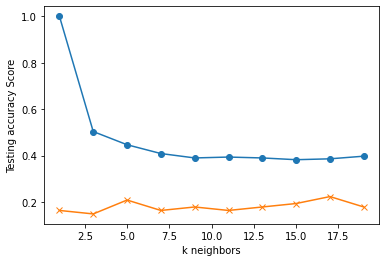

In [15]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range (1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
#STEP 5: re-fit classifier with optimal k value
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train_scaled, y_train)
print("k=5 Test Acc: %.3f" %knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.209


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
y = df['loc_zone']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
score = rf.score(X_test_scaled, y_test)

## Hypertune the Model

In [18]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 60, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 650, 1100, 1550, 2000]}


In [19]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 60, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=42, verbose=2)

In [21]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

## Select best Parameters to Define the Model and Score

In [22]:
rf2 = RandomForestClassifier(n_estimators=1100, min_samples_split =2, min_samples_leaf = 4, max_features='sqrt', max_depth=10, bootstrap='True')
rf2 = rf2.fit(X_train_scaled, y_train)
score = rf2.score(X_test_scaled, y_test)

print(f"Random Forest Testing Score: {score}")

Random Forest Testing Score: 0.1791044776119403


## Export Model

In [23]:
import pickle
pickle.dump(rf2, open("../../models/rf_loc.pkl", "wb"))

In [24]:
with open("../../models/rf_loc.pkl", "rb") as f:
    model_object = pickle.load(f)
    f.close()

In [25]:
model_object

RandomForestClassifier(bootstrap='True', max_depth=10, max_features='sqrt',
                       min_samples_leaf=4, n_estimators=1100)